In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))


z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

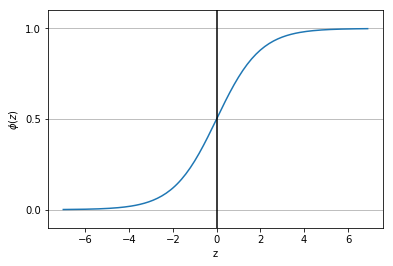

In [3]:
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis thicks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.show()

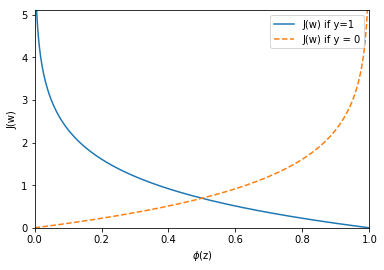

In [4]:
def cost_1(z):
    return -np.log(sigmoid(z))


def cost_0(z):
    return -np.log(1 - sigmoid(z))


z = np.arange(-10, 10, 0.1)

phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')
c0 = [cost_0(x) for x in z]

plt.plot(phi_z, c0, linestyle='--', label='J(w) if y = 0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.show()

In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def plot_decision_regions(x, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cl, 0],
                    y=x[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolors='black')
        
    # highlight test samples
    if test_idx:
        x_test, y_test = x[test_idx, :], y[test_idx]
        
        plt.scatter(x_test[:, 0], x_test[:, 1],
                    c='',
                    edgecolors='black',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=100,
                    label='test set'
                    )

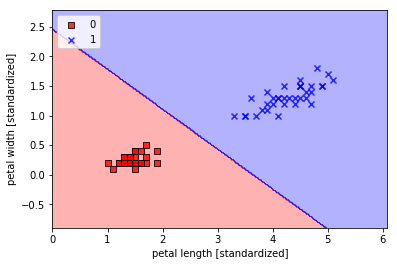

In [12]:
from ch3.tema_4_logistic_regression.logistic_regression_gd import LogisticRegressionGD

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)

lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(x=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()


/home/raziel/.virtualenvs/PythonMachineLearning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/raziel/.virtualenvs/PythonMachineLearning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


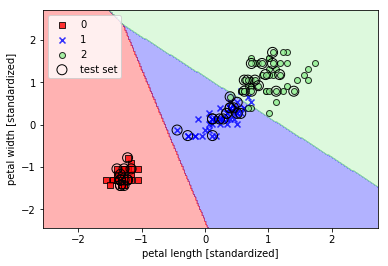

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# prepare data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [16]:
lr.predict_proba(X_test_std[:3, :])
# lr.predict_proba(X_test_std[:3, :]).sum(axis=1)
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [17]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [18]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

AttributeError: 'LogisticRegression' object has no attribute 'fir'

/home/raziel/.virtualenvs/PythonMachineLearning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/raziel/.virtualenvs/PythonMachineLearning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/raziel/.virtualenvs/PythonMachineLearning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/raziel/.virtualenvs/PythonMachineLearning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this 

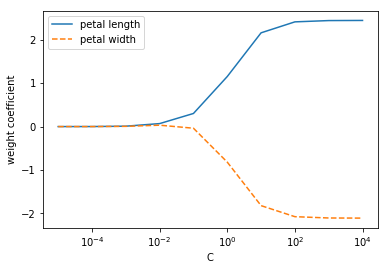

In [20]:
weigths, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weigths.append(lr.coef_[1])
    params.append(10.**c)
    
weigths = np.array(weigths)
plt.plot(params, weigths[:, 0], label='petal length')
plt.plot(params, weigths[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()